Our goal is to determine the best neighborhood in Pittsburgh based on the overall quality and quantity of public services that it provides to its residents. In particular, we are focusing on the amount of parks in the neighborhood, the facilities located within the neighborhood, and the quality of education within the neighborhood.

The first data set we will be analyzing is the 'City Facilities' CSV, which is data pulled from the Operations Management System for the Department of Public Works. This data set provides us with a number of useful categories: facility name, neighborhood, type of facility, logitude/latitude, and even images of each. We will mostly be using facility type and neighborhood, as these categories lend themselves the strongest to our mission of determining the best neighborhood in Pittsburgh.

The first metric we will be looking at is the facilities located within each neighborhood. First, here are all the neighborhoods with more than 10 public facilities available to its residence.

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
data = pd.read_csv("https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

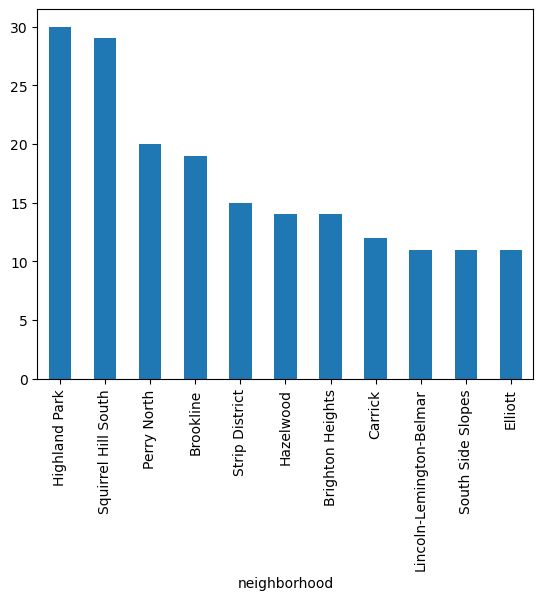

In [28]:
facilities = data["neighborhood"].value_counts().sort_values(ascending=False) 
facilities_query_mask = facilities > 10
facilities[facilities_query_mask].plot.bar()
plt.show()

Here are the neighborhoods with just the most important types of facilities. If you want any clarification on why these facilities were deemed not important, please ask; but for the most part, only facilities that directly served the neighborhoods and greatly affected residents were chosen.

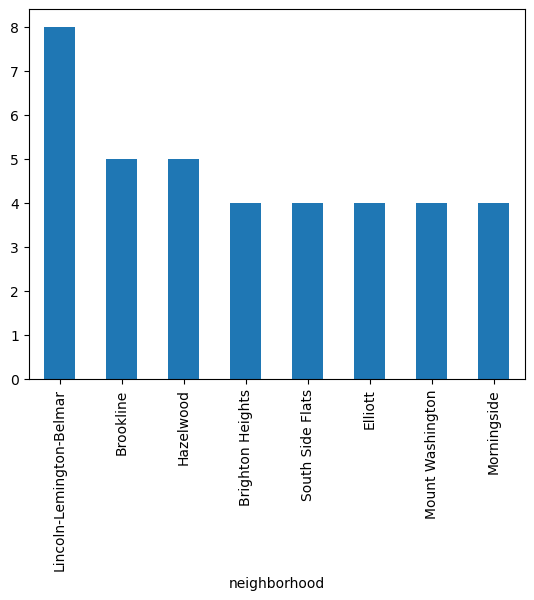

In [29]:
least_important = ["OFFICE", "Office", "Salt Dome", "TRAINING", "Training", "Pool Closed", "Vacant", "Storage", "STORAGE", 
                   "SERVICE", "Service", "Concession", "Dugout", "Shelter", "Cabin", "Restrooms", "Utility"]
data_filtered = data[~data["type"].isin(least_important)]
data_filtered_grouped = data_filtered["neighborhood"].value_counts().sort_values(ascending=False)
amt_query_mask_filtered = data_filtered_grouped > 3
data_filtered_grouped[amt_query_mask_filtered].plot.bar()
plt.show()

# edit axis, labels, etc

Here is a heatmap of all facilites (top) and most important facilities (bottom)

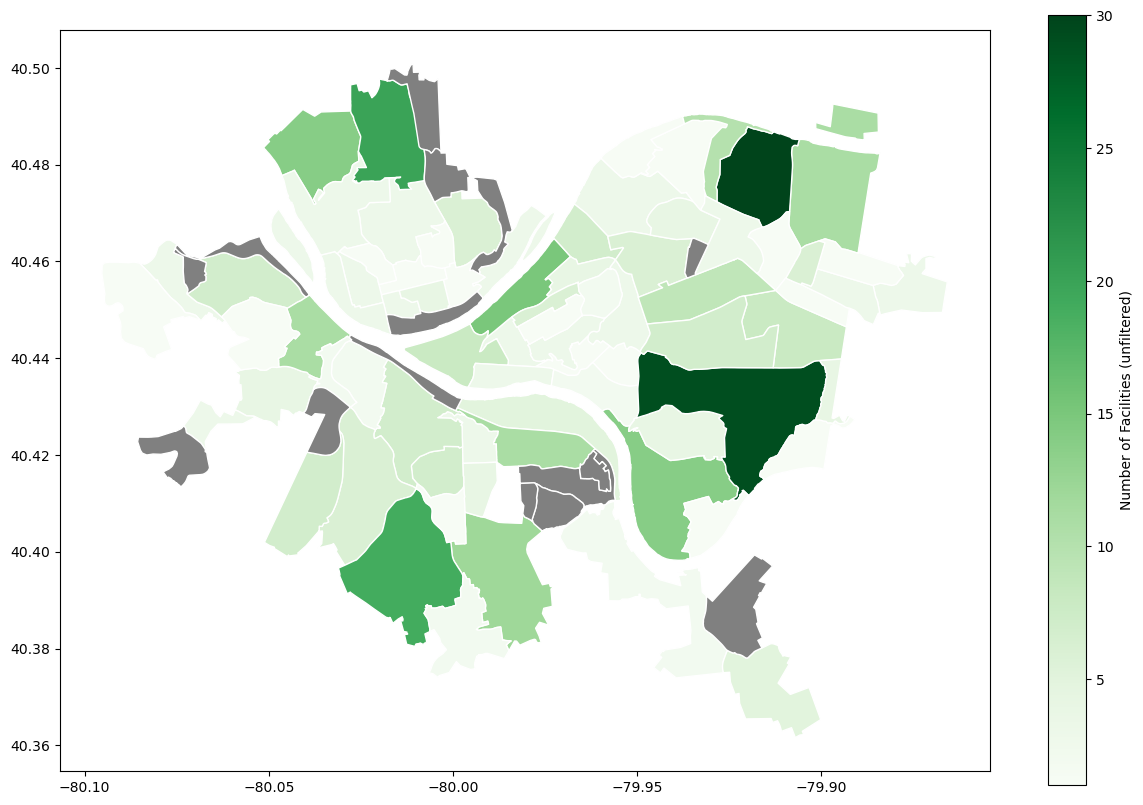

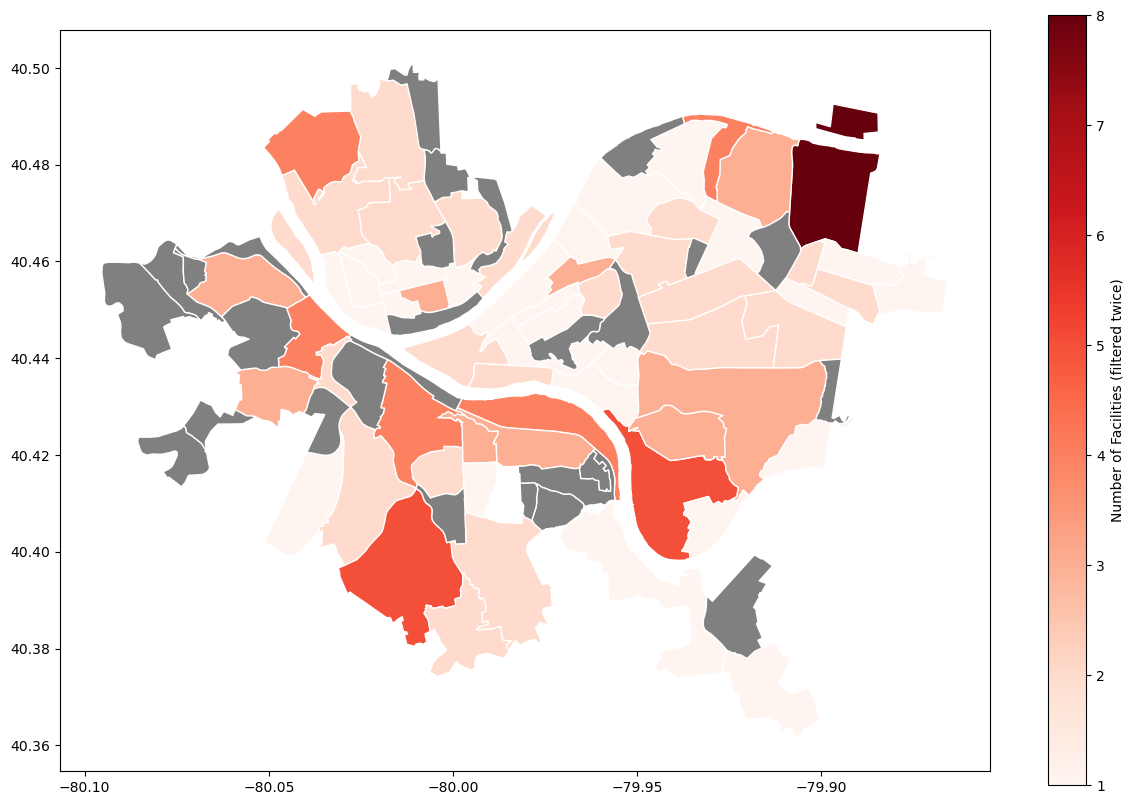

In [35]:
# Some code borrowed from geopandas example in lab lesson

facilities.name = "facAmt"
facilities_map = neighborhoods.merge(facilities, how='left', left_on='hood', right_on='neighborhood')
pd.set_option('display.max_columns', None)
facilities_map.plot(column='facAmt', # set the data to be used for coloring
               cmap="Greens",              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities (unfiltered)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "gray"} # set disctricts with no data to gray
               )

data_filtered_grouped.name = "DFG"
facilities_map = neighborhoods.merge(data_filtered_grouped, how='left', left_on='hood', right_on='neighborhood')
pd.set_option('display.max_columns', None)
facilities_map.plot(column='DFG', # set the data to be used for coloring
               cmap="Reds",              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities (filtered twice)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "gray"} # set disctricts with no data to gray
               )
plt.show()



-----------------------------------------------------------------------------------------------------------
This is how education is in Pittsburgh ...

-----------------------------------------------------------------------------------------------------------
These are the parks in Pittsburghand how big they are...

Based on our metrics, we have determined that Brookline is the best neighborhood in Pittsburgh. It has the 2nd largest amount of important facilities, and is 4th on public facilities overall. [PARKS REASONING]. [EDUCATION REASONING]. 

Here are some graphs helping express this